In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def classify(model, X, y):
    skf = StratifiedKFold()
    yp = cross_val_predict(model, X, y, cv=skf)
    acc = accuracy_score(y,yp)*100
    pre = precision_score(y, yp)*100
    rec = recall_score(y,yp)*100
    return (acc, pre, rec)

In [3]:
def run(model, df):
    results = []
    for filetype in np.unique(df['filetype']):
        cond1 = df['filetype'] == filetype
        X = df[cond1].drop(['class', 'filetype', 'algorithm'], axis=1)
        y = df[cond1]['class']
        acc, pre, rec = classify(model, X, y)
        results.append([filetype, acc, pre, rec])
    return results

In [4]:
def plot_results(results, model_name):
    results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
    results.plot.bar(x='filetype')
    plt.legend(loc='lower right')
    plt.ylabel('percentage (%)')
    plt.title('classification results (%s)' % model_name);

In [5]:
df = pd.read_csv('features.csv')
df.fillna(0, inplace=True)

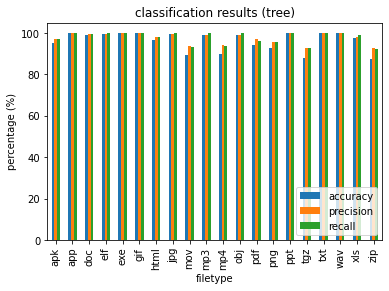

In [6]:
plot_results(run(Tree(), df), 'tree')

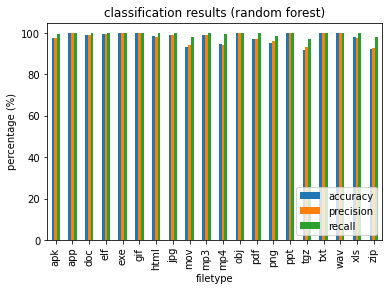

In [7]:
plot_results(run(RandomForestClassifier(), df), 'random forest')

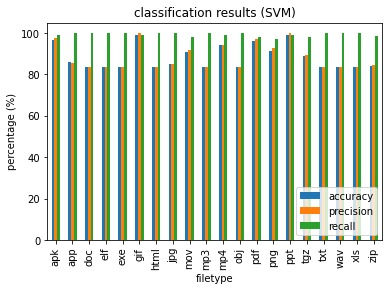

In [8]:
plot_results(run(SVC(gamma='auto'), df), 'SVM')

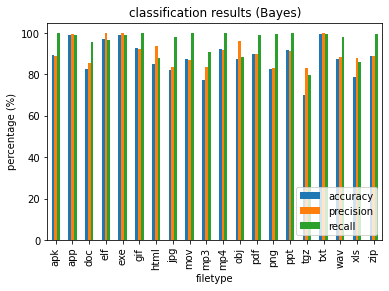

In [9]:
plot_results(run(GaussianNB(), df), 'Bayes')

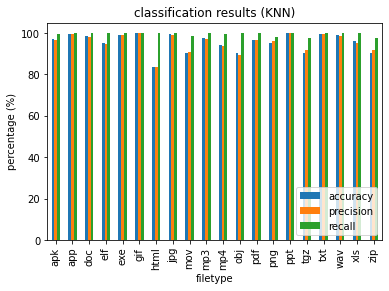

In [10]:
plot_results(run(KNeighborsClassifier(), df), 'KNN')

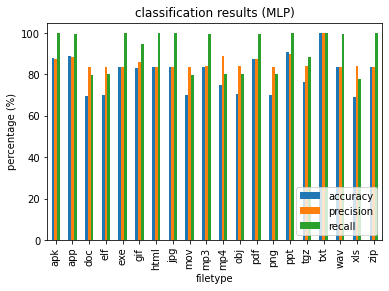

In [11]:
# copy the data
norm = df.copy()
  
# apply normalization techniques
for column in ['kurtosis','entropy','stdev','chi','autocorr','mean']:
    norm[column] = norm[column]  / norm[column].abs().max()
    
plot_results(run(MLPClassifier(), norm), 'MLP')

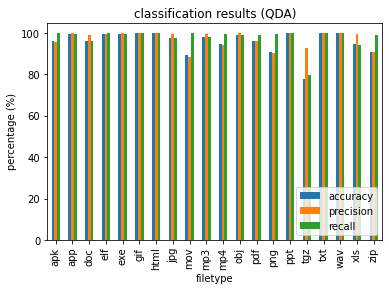

In [12]:
plot_results(run(QuadraticDiscriminantAnalysis(), df), 'QDA')

In [13]:
X = df.drop(['class', 'algorithm', 'filetype'], axis=1)
y = df['class']
skf = StratifiedKFold()
yp = cross_val_predict(RandomForestClassifier(), X, y, cv=skf)
acc = accuracy_score(y,yp)*100
pre = precision_score(y, yp)*100
rec = recall_score(y,yp)*100
print(acc, pre, rec)

95.90384098845017 95.90725178960473 99.32312651087832


apk 96.86109159053643 96.91654104426478 99.39564300773014
app 99.24812030075188 99.84871406959152 99.24812030075188
doc 99.00709219858156 99.74293059125964 99.06382978723404
elf 97.61904761904762 100.0 97.14285714285714
exe 99.40476190476191 100.0 99.28571428571429
gif 99.43464495703302 99.95904995904996 99.36227951153325
html 100.0 100.0 100.0
jpg 99.02564102564102 99.5679012345679 99.26153846153845
mov 91.74285714285715 91.58139044202976 99.21142857142857
mp3 99.66666666666667 99.8 99.8
mp4 94.6625344352617 94.49901768172889 99.3801652892562
obj 100.0 100.0 100.0
pdf 96.87915006640107 97.17275851296469 99.13944223107569
png 94.49404761904762 94.51484773973898 99.1468253968254
ppt 99.5492371705964 99.98605883173009 99.47295423023579
tgz 90.54325955734407 90.21540708287696 99.43661971830986
txt 99.65277777777779 99.94029850746269 99.64285714285714
wav 99.23611111111111 100.0 99.08333333333333
xls 97.36842105263158 98.59154929577466 98.24561403508771
zip 92.23958333333333 91.81556195965

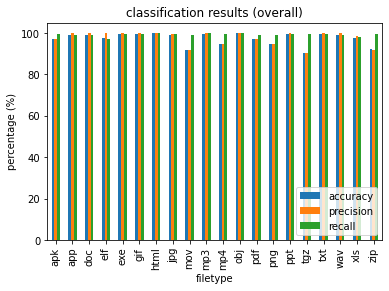

In [17]:
results = []
for filetype in np.unique(df['filetype']):
    cond1 = df['filetype'] == filetype
    acc = accuracy_score(y[cond1],yp[cond1])*100
    pre = precision_score(y[cond1],yp[cond1])*100
    rec = recall_score(y[cond1],yp[cond1])*100
    print(filetype, acc, pre, rec)
    results.append([filetype, acc, pre, rec])
    
results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
results.plot.bar(x='filetype')
plt.legend(loc='lower right')
plt.ylabel('percentage (%)')
plt.title('classification results (overall)');